In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd  # 데이터 조작 및 분석을 위한 pandas 라이브러리
import numpy as np   # 수치 연산을 위한 numpy 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib 라이브러리
import seaborn as sns #데이터 시각화를 위한 seaborn 라이브러리

### 1. 데이터 로드 (어려운 파일 읽기)

**1. 이유 (Why):** 깔끔하지 않은 텍스트 데이터를 읽어서 표로 만듭니다.

**2. 중요 포인트 (Key Point):** sep='\s+'는 공백이 뒤죽박죽 섞여 있어도 잘 자르라는 뜻입니다.

**3. 주목할 점 (Focus):** 데이터 크기(shape)가 (506, 13)인지 확인하세요.


In [ ]:
# 보스턴 주택 데이터셋 URL 정의
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# CSV 파일 읽기
# sep="\s+": 공백을 구분자로 사용
# skiprows=22: 처음 22줄은 설명이므로 건너뜀
# header=None: 열 이름이 없으므로 자동으로 0, 1, 2, ... 지정
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 데이터 재구성
# raw_df.values[::2, :]: 짝수 행의 모든 열 선택 (특성 데이터)
# raw_df.values[1::2, :2]: 홀수 행의 처음 두 열 선택 (추가 특성 데이터)
# np.hstack(): 두 배열을 가로로 연결
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# 타겟 변수 선택 (주택 가격)
# raw_df.values[1::2, 2]: 홀수 행의 세 번째 열 선택
target = raw_df.values[1::2, 2]

# 특성 이름 정의 (총 13개 특성)
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 특성 데이터를 판다스 DataFrame으로 변환
# columns=feature_names: 위에서 정의한 특성 이름을 열 이름으로 사용
data = pd.DataFrame(data, columns=feature_names)

# 타겟 데이터를 판다스 DataFrame으로 변환
# columns=['Target']: 열 이름을 'Target'으로 지정
target = pd.DataFrame(target, columns=['Target'])

# 데이터셋 크기 출력
print("데이터 shape:", data.shape)  # (행 수, 열 수) 형태로 출력
print("타겟 shape:", target.shape)  # (행 수, 열 수) 형태로 출력

# 데이터 미리보기
print("\n데이터 미리보기:")
print(data.head())  # 처음 5행 출력

# 타겟 미리보기
print("\n타겟 미리보기:")
print(target.head())  # 처음 5행 출력

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1011795694.py:12: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


데이터 shape: (506, 13)
타겟 shape: (506, 1)

데이터 미리보기:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

타겟 미리보기:
   Target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2


In [ ]:
# 데이터프레임 결합하기
df = pd.concat([data, target], axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


# 데이터 탐색 (EDA)

In [ ]:
# 데이터프레임의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# 결측값 확인
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


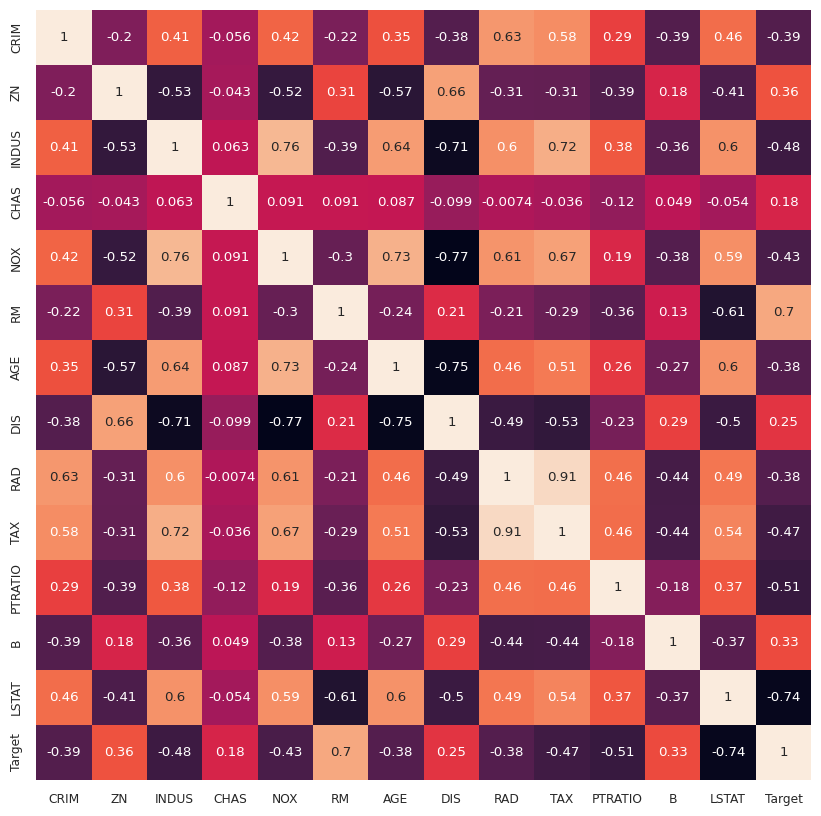

In [ ]:
# 상관계수 행렬
df_corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False);
plt.show()

In [ ]:
# 변수 간의 상관관계 분석 - Target 변수와 상관관계가 높은 순서대로 정리
corr_order = df_corr.loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

,Target
LSTAT,0.737663
RM,0.695360
PTRATIO,0.507787
INDUS,0.483725
TAX,0.468536
NOX,0.427321
CRIM,0.388305
RAD,0.381626
AGE,0.376955
ZN,0.360445


In [ ]:
# Target 변수와 상관관계가 높은 4개 변수를 추출
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


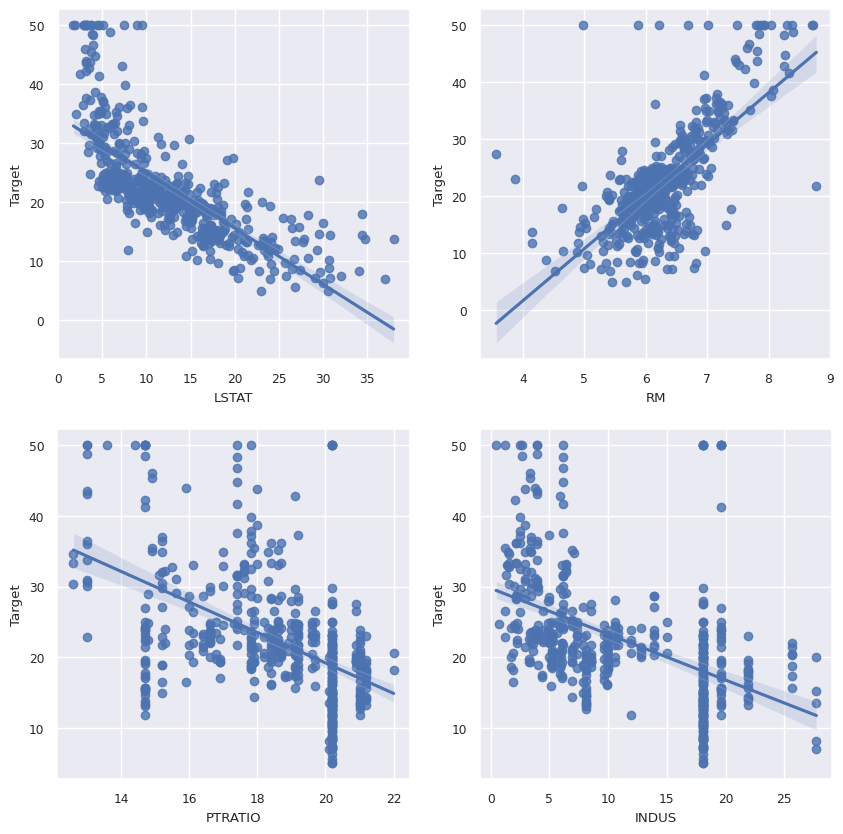

In [ ]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    ax1 = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

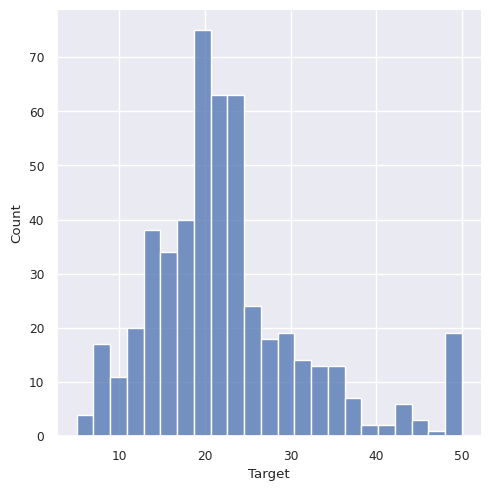

In [ ]:
# Target 데이터의 분포
sns.displot( x='Target', kind='hist', data=df)
plt.show()

# 데이터 전처리

In [ ]:
# 사이킷런 MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled = df.iloc[:, :-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [ ]:
# 학습 - 테스트 데이터셋 분할
# [ANNOTATION] Splitting data into 80% training and 20% testing sets to evaluate model generalization.
from sklearn.model_selection import train_test_split
X_data = df.loc[:, ['LSTAT', 'RM']]
y_data = df.loc[:, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


# Baseline 모델 - 선형 회귀

In [ ]:
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
# [ANNOTATION] Initializing the baseline Linear Regression model.
lr = LinearRegression()
# [ANNOTATION] Training the model on the training data.
lr.fit(X_train, y_train)

print ("회귀계수(기울기): ", np.round(lr.coef_, 1))
print ("상수항(절편): ", np.round(lr.intercept_, 1))

회귀계수(기울기):  [-23.2  25.4]
상수항(절편):  16.3


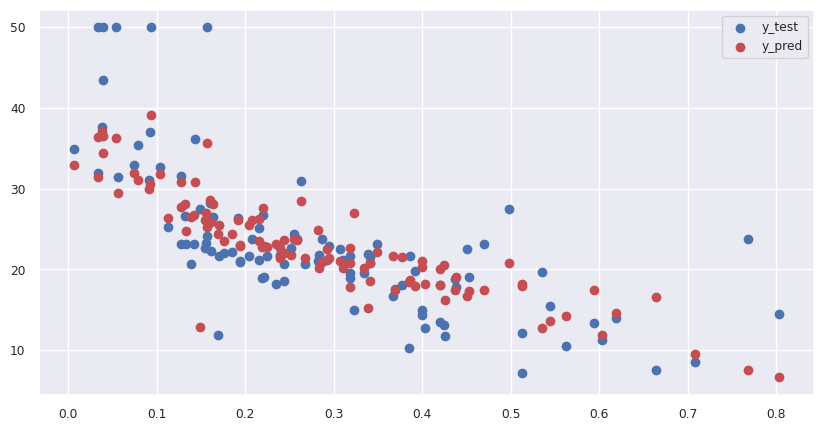

In [ ]:
# 예측
y_test_pred = lr.predict(X_test)

# 예측값, 실제값의 분포
plt.figure(figsize=(10, 5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [ ]:
# 평가
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 30.8042
Test MSE: 29.5065


## 교차 검증

In [ ]:
# [ANNOTATION] Performing 5-fold cross-validation to check model stability across different data subsets.
# cross_val_score 함수
from sklearn.model_selection import cross_val_score
# [ANNOTATION] Initializing the baseline Linear Regression model.
lr = LinearRegression()
mse_scores = -1*cross_val_score(lr, X_train, y_train, cv=5,
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
                                scoring='neg_mean_squared_error')
print("개별 Fold의 MSE: ", np.round(mse_scores, 4))
print("평균 MSE: %.4f" % np.mean(mse_scores))

개별 Fold의 MSE:  [31.465  34.668  28.9147 29.3535 34.6627]
평균 MSE: 31.8128


# L1/L2 규제

### 3. 다항 회귀 (곡선 그리기)

**1. 이유 (Why):** 데이터를 제곱하거나 곱해서 특성을 뻥튀기합니다.

**2. 중요 포인트 (Key Point):** degree=2는 2차 곡선까지 그린다는 뜻입니다.

**3. 주목할 점 (Focus):** Train 점수는 좋은데 Test 점수가 나빠지면(과적합) 위험합니다.


In [ ]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
# [ANNOTATION] Creating 2nd-degree polynomial features to capture non-linear relationships.
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
print("원본 학습 데이터셋: ", X_train.shape)
print("2차 다항식 변환 데이터셋: ", X_train_poly.shape)

원본 학습 데이터셋:  (404, 2)
2차 다항식 변환 데이터셋:  (404, 6)


In [ ]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
# [ANNOTATION] Initializing the baseline Linear Regression model.
lr = LinearRegression()
# [ANNOTATION] Training the model on the training data.
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 21.5463
Test MSE: 16.7954


### 3. 다항 회귀 (곡선 그리기)

**1. 이유 (Why):** 데이터를 제곱하거나 곱해서 특성을 뻥튀기합니다.

**2. 중요 포인트 (Key Point):** degree=2는 2차 곡선까지 그린다는 뜻입니다.

**3. 주목할 점 (Focus):** Train 점수는 좋은데 Test 점수가 나빠지면(과적합) 위험합니다.


In [ ]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
# [ANNOTATION] Creating 15th-degree polynomial features. Note: High degrees often lead to overfitting.
pf = PolynomialFeatures(degree=15)
X_train_poly = pf.fit_transform(X_train)

# [ANNOTATION] Initializing the baseline Linear Regression model.
lr = LinearRegression()
# [ANNOTATION] Training the model on the training data.
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 11.5982
Test MSE: 521964431003.3856


### 3. 다항 회귀 (곡선 그리기)

**1. 이유 (Why):** 데이터를 제곱하거나 곱해서 특성을 뻥튀기합니다.

**2. 중요 포인트 (Key Point):** degree=2는 2차 곡선까지 그린다는 뜻입니다.

**3. 주목할 점 (Focus):** Train 점수는 좋은데 Test 점수가 나빠지면(과적합) 위험합니다.


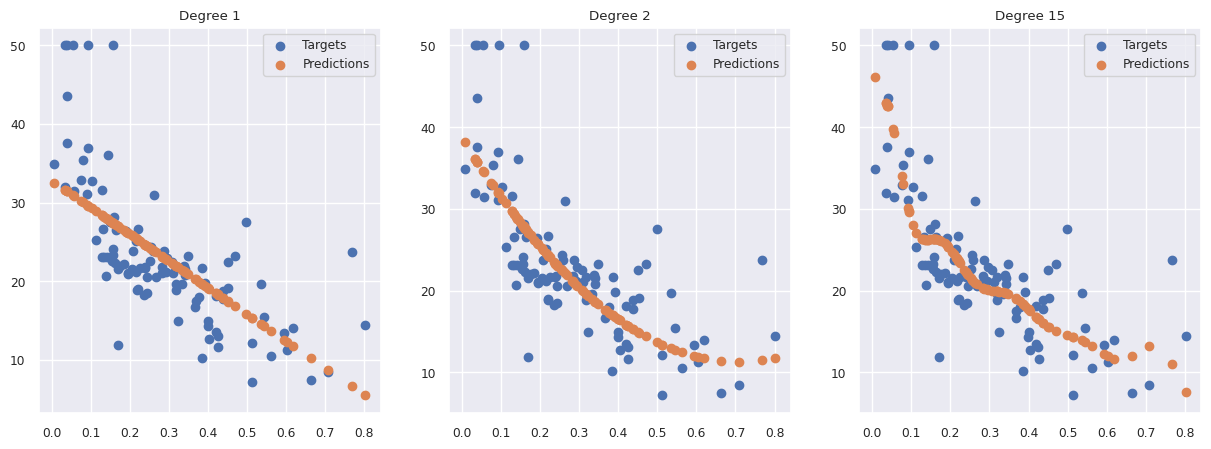

In [ ]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    ax1 = plt.subplot(1, 3, n+1)
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    X_train_poly = pf.fit_transform(X_train.loc[:, ['LSTAT']])
    X_test_poly = pf.fit_transform(X_test.loc[:, ['LSTAT']])
# [ANNOTATION] Initializing the baseline Linear Regression model.
    lr = LinearRegression()
# [ANNOTATION] Training the model on the training data.
    lr.fit(X_train_poly, y_train)
    y_test_pred = lr.predict(X_test_poly)
    # 실제값 분포
    plt.scatter(X_test.loc[:, ['LSTAT']], y_test, label='Targets')
    # 예측값 분포
    plt.scatter(X_test.loc[:, ['LSTAT']], y_test_pred, label='Predictions')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()

### 4. 규제 모델 (고삐 죄기)

**1. 이유 (Why):** 모델이 너무 복잡해지지 않게 패널티를 줍니다.

**2. 중요 포인트 (Key Point):** 과적합을 막아 Test 점수를 올리는 것이 목표입니다.

**3. 주목할 점 (Focus):** 기본 모델보다 성능이 좋아졌는지 확인하세요.


In [ ]:
# Ridge (L2 규제)
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5)
rdg.fit(X_train_poly, y_train)

y_train_pred = rdg.predict(X_train_poly)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 35.9484
Test MSE: 42.0011


### 4. 규제 모델 (고삐 죄기)

**1. 이유 (Why):** 모델이 너무 복잡해지지 않게 패널티를 줍니다.

**2. 중요 포인트 (Key Point):** 과적합을 막아 Test 점수를 올리는 것이 목표입니다.

**3. 주목할 점 (Focus):** 기본 모델보다 성능이 좋아졌는지 확인하세요.


In [ ]:
# Lasso (L1 규제)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = las.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 32.3204
Test MSE: 37.7103


### 4. 규제 모델 (고삐 죄기)

**1. 이유 (Why):** 모델이 너무 복잡해지지 않게 패널티를 줍니다.

**2. 중요 포인트 (Key Point):** 과적합을 막아 Test 점수를 올리는 것이 목표입니다.

**3. 주목할 점 (Focus):** 기본 모델보다 성능이 좋아졌는지 확인하세요.


In [ ]:
# ElasticNet (L2/L1 규제)
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(X_train_poly, y_train)

y_train_pred = ela.predict(X_train_poly)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = ela.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 33.7551
Test MSE: 39.4968


# 트리 기반 모델 - 비선형 회귀

### 5. 고급 모델 (트리 기반)

**1. 이유 (Why):** 선 긋기 대신 '스무고개' 방식으로 문제를 풉니다.

**2. 중요 포인트 (Key Point):** RandomForest나 XGBoost는 실무에서 가장 많이 쓰는 강력한 모델입니다.

**3. 주목할 점 (Focus):** 에러(MSE)가 확 줄어드는 것을 감상하세요.


In [ ]:
# 의사결정 나무
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 18.8029
Test MSE: 17.9065


### 5. 고급 모델 (트리 기반)

**1. 이유 (Why):** 선 긋기 대신 '스무고개' 방식으로 문제를 풉니다.

**2. 중요 포인트 (Key Point):** RandomForest나 XGBoost는 실무에서 가장 많이 쓰는 강력한 모델입니다.

**3. 주목할 점 (Focus):** 에러(MSE)가 확 줄어드는 것을 감상하세요.


In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 16.0201
Test MSE: 17.7751


In [ ]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
# [ANNOTATION] Calculating Mean Squared Error (MSE) to quantify prediction accurancy (Lower is better).
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 3.9261
Test MSE: 19.9509
